# runing in local

In [7]:
def get_flight_str(URL):
    # imports
    from selenium import webdriver
    from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
    from bs4 import BeautifulSoup
    import time
    from selenium.webdriver.common.by import By
    from selenium.common.exceptions import TimeoutException, NoSuchElementException
    # choose chrome
    driver = webdriver.Chrome()
    driver.implicitly_wait(10)
    # # initial
    try:
        driver.get(URL)
    except TimeoutException:
        print('time out')
    # # get prices sheet
    try:
        button = driver.find_element(By.CLASS_NAME,"gws-flights-form__departure-input")
    except NoSuchElementException:
        print('no element ')
    button.click()
    time.sleep(5)
    # # loop get month price
    # monthp
    monthp = ""
    # get the first 2 months prices
    try:
        tmp = driver.find_elements(By.CLASS_NAME,"gws-travel-calendar__month")
    except NoSuchElementException:
        print('no such element')
    for tmp1 in tmp:
        monthp = monthp+tmp1.text
    # get bottonnext
    try:
        buttonnext = driver.find_element(By.CLASS_NAME,"gws-travel-calendar__next")
    except NoSuchElementException:
        print('no element ')
    # get next months prices
    for i in range(4):
        # next 2 months
        buttonnext.click()
        time.sleep(3)
        buttonnext.click()
        time.sleep(3)    
        # get the prices
        try:
            tmp = driver.find_elements(By.CLASS_NAME,"gws-travel-calendar__month")
        except NoSuchElementException:
            print('no such element')
        for tmp1 in tmp:
            monthp = monthp+tmp1.text
    driver.close()
    return(monthp)

In [8]:
URL1 = "https://www.google.com/flights#flt=OSL.AMS.2019-04-05;c:NOK;e:1;sd:1;t:f;tt:o"
URL2 = "https://www.google.com/flights#flt=OSL./m/0947l.2019-04-05;c:NOK;e:1;sd:1;t:f;tt:o"
URL3 = "https://www.google.com/flights#flt=OSL./m/056_y.2019-04-05;c:NOK;e:1;sd:1;t:f;tt:o"
URLs = [URL1, URL2, URL3]
monthpl = []
for URL in URLs:
    monthpl.append(get_flight_str(URL))

In [13]:
f = open('monthp.txt', 'w', encoding='utf8')
for s in monthpl:
    f.write(s)
f.close()

# run in cloud

In [242]:
with open('monthp.txt','r') as a:
    monthp = a.read()

In [243]:
AMS = monthp.split("/n")[0]
MIL = monthp.split("/n")[1]
MAD = monthp.split("/n")[2]

In [244]:
# use which one?
k = 0

In [245]:
USE = [AMS, MIL, MAD][k]

In [246]:
marmay = USE.split(u"六月\n一二三四五六日")[0].split(u"三月\n一二三四五六日\n1\n2\n3\n4\n5\n6")[1].split(u"三四五六日")
mar = marmay[0][1:-5].split("\n")
apr = marmay[1][1:-3].split("\n")
may = marmay[2][1:].split("\n")

price1 = []
for i in range(int(len(mar)/2)):
    price1.append(["mar"+mar[2*i],int(mar[2*i+1].replace(",",""))])
for i in range(int(len(apr)/2)):
    price1.append(["apr"+apr[2*i],int(apr[2*i+1].replace(",",""))])
for i in range(int(len(may)/2)):
    price1.append(["may"+may[2*i],int(may[2*i+1].replace(",",""))])

In [247]:
octjan = USE.split(u"六月\n一二三四五六日")[1].split(u"十月\n一二三四五六日")[1].split(u"\n一二三四五六日")
oct = octjan[0][1:-3].split("\n")
nov = octjan[1][1:-3].split("\n")
dec = octjan[2][1:-7].split("\n")
jan = octjan[3][1:].split("\n")

price2 = []
for i in range(int(len(oct)/2)):
    price2.append(["oct"+oct[2*i],int(oct[2*i+1].replace(",",""))])
for i in range(int(len(nov)/2)):
    price2.append(["nov"+nov[2*i],int(nov[2*i+1].replace(",",""))])
for i in range(int(len(dec)/2)):
    price2.append(["dec"+dec[2*i],int(dec[2*i+1].replace(",",""))])
for i in range(int(len(jan)/2)):
    price2.append(["jan"+jan[2*i],int(jan[2*i+1].replace(",",""))])

# data ready

In [249]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [296]:
# choose price1 or 2 (marmay or octjan)
price = price1

In [297]:
# change to DF
fares = pd.DataFrame(price, columns=["day","price"])

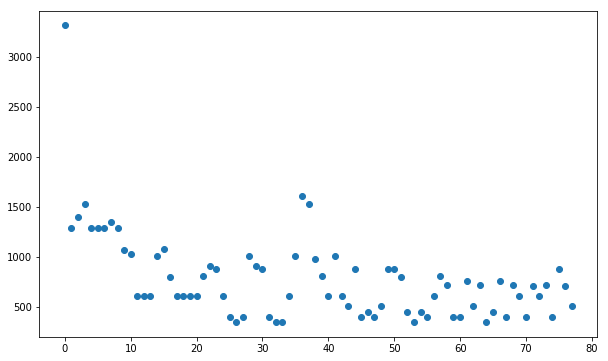

In [298]:
# point plot
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(np.arange(len(fares['price'])),fares['price'])

In [299]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [300]:
ff = pd.DataFrame(fares['price']).reset_index()

In [301]:
# for x and y, Z-score it: "(value-mean_value)/sd"
X = StandardScaler().fit_transform(ff)
# do the 
db = DBSCAN(eps=.4, min_samples=1).fit(X)
# please ignore the error, error is nothing

/usr/local/python3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/python3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Text(0.5, 1.01, 'total clusters: 7')

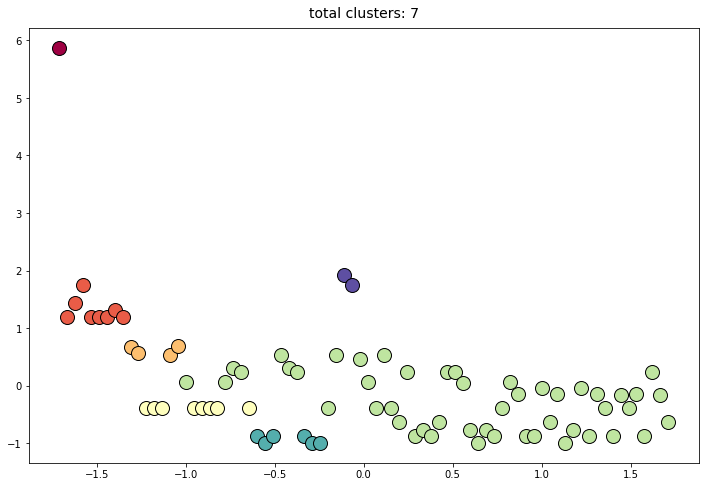

In [302]:
# plot it, I do not know why so many codes
labels = db.labels_
clusters = len(set(labels))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
plt.subplots(figsize=(12, 8))
for k, c in zip(unique_labels, colors) :
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=c, markeredgecolor='k', markersize=14)
plt.title("total clusters: {}".format(clusters), fontsize=14, y=1.01)

In [303]:
pf = pd.concat([fares['day'],ff,pd.DataFrame(db.labels_,columns=['cluster'])], axis=1)
pf[:5]

,day,index,price,cluster
0,mar7,0,3312,0
1,mar8,1,1290,1
2,mar9,2,1400,1
3,mar10,3,1532,1
4,mar11,4,1290,1


In [304]:
rf = pf.groupby('cluster')['price'].agg(['min','count'])
rf

,min,count
cluster,,
0,3312,1
1,1290,8
2,1010,4
3,610,8
4,349,49
5,349,6
6,1531,2


In [305]:
rf.describe([.1,.25,.5,.75,.9])

,min,count
count,7.000000,7.000000
mean,1207.285714,11.142857
std,1033.637221,16.915758
min,349.000000,1.000000
10%,349.000000,1.600000
25%,479.500000,3.000000
50%,1010.000000,6.000000
75%,1410.500000,8.000000
90%,2243.400000,24.400000
max,3312.000000,49.000000


In [309]:
# the days
pf[pf['cluster'] == 5][:5]

,day,index,price,cluster
25,apr1,25,399,5
26,apr2,26,349,5
27,apr3,27,399,5
31,apr7,31,399,5
32,apr8,32,349,5
